Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [2]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [3]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [4]:
# YOUR CODE GOES HERE
display(transactions.head())
display(items.head())
display(item_categories.head())
display(shops.head())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [5]:
# YOUR CODE GOES HERE
df_ans = transactions[['date', 'shop_id', 'item_price', 'item_cnt_day']].copy()

df_ans['date']= pd.to_datetime(df_ans['date'], format='%d.%m.%Y')
df_ans['year'] = df_ans['date'].dt.year
df_ans['month'] = df_ans['date'].dt.month

df_ans = df_ans[(df_ans['year'] == 2014) & (df_ans['month'] == 9)]
df_ans['revenue'] = df_ans['item_price'] * df_ans['item_cnt_day']

max_revenue = df_ans[['shop_id', 'revenue']] \
    .groupby('shop_id') \
    .sum() \
    .rename(columns={'revenue': 'Total revenue'}) \
    .max()['Total revenue']

# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [6]:
# YOUR CODE GOES HERE
df_ans = transactions[['date', 'item_id', 'item_price', 'item_cnt_day']].copy()

df_ans['date']= pd.to_datetime(df_ans['date'], format='%d.%m.%Y')
df_ans['year'] = df_ans['date'].dt.year
df_ans['month'] = df_ans['date'].dt.month

df_ans = df_ans[(df_ans['year'] == 2014) & (df_ans['month'] >= 6) & (df_ans['month'] <= 8)]
df_ans['revenue'] = df_ans['item_price'] * df_ans['item_cnt_day']
df_ans = pd.merge(df_ans, items, on='item_id', how='left')

category_id_with_max_revenue = df_ans[['item_category_id', 'revenue']] \
    .groupby('item_category_id') \
    .sum() \
    .rename(columns={'revenue': 'Total revenue'}) \
    .sort_values('Total revenue', ascending=False).reset_index()['item_category_id'][0]

# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [7]:
# YOUR CODE GOES HERE
df_ans = transactions[['item_id', 'item_price']].copy()
df_ans = df_ans.groupby('item_id') \
    .nunique() \
    .reset_index(drop=True).rename(columns={'item_price': 'item_price_uniques'})

df_ans = df_ans[df_ans['item_price_uniques'] == 1]
num_items_constant_price = len(df_ans)

# PUT YOUR ANSWER IN THIS VARIABLE
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

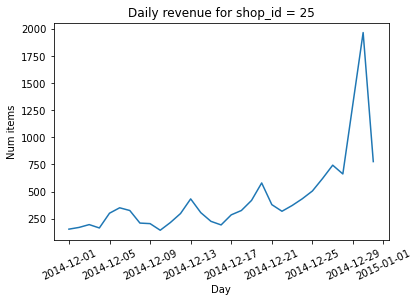

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [8]:
shop_id = 25

# YOUR CODE GOES HERE
df_ans = transactions[['date', 'shop_id', 'item_cnt_day']].copy()

df_ans['date']= pd.to_datetime(df_ans['date'], format='%d.%m.%Y')
df_ans['month'] = df_ans['date'].dt.month
df_ans['year'] = df_ans['date'].dt.year

df_ans = df_ans[(df_ans['year'] == 2014) & (df_ans['month'] == 12)]
df_ans = df_ans[df_ans['shop_id'] == shop_id]

df_ans = df_ans[['date', 'item_cnt_day']] \
    .groupby('date') \
    .sum() \
    .rename(columns={'item_cnt_day': 'total_num_items_sold'}).reset_index()


# YOUR CODE GOES HERE
total_num_items_sold = df_ans['total_num_items_sold'].astype(int).to_list()
days = df_ans['date'].to_list()

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.xticks(
    rotation=25)
plt.show()

# YOUR CODE GOES HERE
total_num_items_sold_var = np.var(total_num_items_sold, ddof=1)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [9]:
STUDENT_EMAIL = 'dangledangkhoa@gmail.com' # EMAIL HERE
STUDENT_TOKEN = 'BQ2nsEYz0XsY5XPs' # TOKEN HERE
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [10]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)